## ECONOMIC MARKERS USING UNSUPERVISED LEARNING
### By Alice Chang (for IOD Data Science & AI - Project 3)
##### 11 September 2021

### IMPORT LIBRARIES

In [1]:
import numpy as np # For Linear algebra
import pandas as pd # Exploratory Data Analysis

# Avoid warnings on version change 
import warnings
warnings.filterwarnings('ignore')

# For plotting graphs
from matplotlib import pyplot as plt 
import seaborn as sns 
%matplotlib inline 

# SKlearn library
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

plt.rcParams['figure.figsize']=(9,7)

### LOAD DATASET AND EXAMINE DATA

In [2]:
df = pd.read_csv('economic_freedom_index_2019.csv', encoding = "ISO-8859-1")
df.head(5)

,CountryID,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judicial Effectiveness,Government Integrity,Tax Burden,...,Gov Expenditure of GDP,Population (Millions),GDP (Billions PPP),GDP Growth Rate,5 Year GDP Growth Rate,GDP per Capita (PPP),Unemployment,Inflation,FDI Inflow (Millions),Public Debt (of GDP)
0,1,Afghanistan,Asia-Pacific,152,39,51.5,19.6,29.6,25.2,91.7,...,25.6,35.5,$69.60,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Europe,52,27,66.5,54.8,30.6,40.4,86.3,...,29.5,2.9,$36.00,3.9,2.5,"$12,507",13.9,2.0,"1,119.10",71.2
2,3,Algeria,Middle East and North Africa,171,14,46.2,31.6,36.2,28.9,76.4,...,41.4,41.5,$632.90,2.0,3.1,"$15,237",10.0,5.6,"1,203.00",25.8
3,4,Angola,Sub-Saharan Africa,156,33,50.6,35.9,26.6,20.5,83.9,...,25.3,28.2,$190.30,0.7,2.9,"$6,753",8.2,31.7,"-2,254.50",65.3
4,5,Argentina,Americas,148,26,52.2,47.8,44.5,33.5,69.3,...,41.0,44.1,$920.20,2.9,0.7,"$20,876",8.7,25.7,"11,857.00",52.6


In [3]:
# Dataset has 180 rows and 32 columns

df.shape

(180, 32)

In [4]:
df.describe()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judicial Effectiveness,Government Integrity,Tax Burden,Gov Spending,Fiscal Health,...,Income Tax Rate,Corporate Tax Rate,Tax Burden of GDP,Gov Expenditure of GDP,Population (Millions),GDP Growth Rate,5 Year GDP Growth Rate,Unemployment,Inflation,Public Debt (of GDP)
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,...,179.000000,179.000000,179.000000,180.000000,180.000000,180.000000,179.000000,175.000000,179.000000,179.000000
mean,92.205556,90.500000,20.538889,60.768333,53.031667,45.536111,42.152222,77.212778,64.515556,66.911667,...,28.511173,24.003352,22.157542,33.246111,40.672778,3.225000,3.146369,7.290857,10.579330,56.277654
std,53.664247,52.105662,12.738611,11.255725,19.313527,17.920616,19.615236,13.208314,22.781009,31.198783,...,13.312206,8.880625,10.152671,13.402857,147.122898,2.765305,2.449243,5.660097,81.167682,33.639127
min,1.000000,1.000000,1.000000,5.900000,7.600000,5.000000,7.900000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.600000,10.600000,0.100000,-14.000000,-7.800000,0.100000,-0.900000,0.000000
25%,45.750000,45.750000,9.750000,53.950000,37.350000,31.450000,28.100000,70.975000,51.900000,42.125000,...,20.000000,20.000000,14.250000,24.300000,2.275000,1.975000,1.900000,3.700000,1.300000,35.000000
50%,91.500000,90.500000,19.500000,60.750000,52.250000,43.100000,36.500000,78.050000,68.900000,80.600000,...,30.000000,25.000000,20.700000,32.200000,8.750000,3.200000,3.100000,5.500000,2.700000,49.400000
75%,138.250000,135.250000,31.000000,67.800000,65.900000,55.550000,50.350000,85.425000,82.300000,91.625000,...,35.000000,30.000000,29.850000,40.075000,29.350000,4.650000,4.450000,9.300000,5.400000,70.050000
max,186.000000,180.000000,47.000000,90.200000,97.400000,92.400000,96.700000,99.800000,96.600000,100.000000,...,60.000000,50.000000,47.000000,117.900000,1390.100000,10.900000,9.900000,27.300000,1087.500000,236.400000


### DATA TIDYING

In [5]:
df.columns = [i.replace(' ','_') for i in df.columns]

In [6]:
df.columns

Index(['CountryID', 'Country_Name', 'Region', 'World_Rank', 'Region_Rank',
       '2019_Score', 'Property_Rights', 'Judicial_Effectiveness',
       'Government_Integrity', 'Tax_Burden', 'Gov_Spending', 'Fiscal_Health',
       'Business_Freedom', 'Labor_Freedom', 'Monetary_Freedom',
       'Trade_Freedom', 'Investment_Freedom_', 'Financial_Freedom',
       'Tariff_Rate', 'Income_Tax_Rate', 'Corporate_Tax_Rate',
       'Tax_Burden_of_GDP', 'Gov_Expenditure_of_GDP_', 'Population_(Millions)',
       'GDP_(Billions_PPP)', 'GDP_Growth_Rate', '5_Year_GDP_Growth_Rate',
       'GDP_per_Capita_(PPP)', 'Unemployment', 'Inflation',
       'FDI_Inflow_(Millions)', 'Public_Debt_(of_GDP)'],
      dtype='object')

In [7]:
df.columns = [i.lower() for i in df.columns]

In [8]:
df.columns

Index(['countryid', 'country_name', 'region', 'world_rank', 'region_rank',
       '2019_score', 'property_rights', 'judicial_effectiveness',
       'government_integrity', 'tax_burden', 'gov_spending', 'fiscal_health',
       'business_freedom', 'labor_freedom', 'monetary_freedom',
       'trade_freedom', 'investment_freedom_', 'financial_freedom',
       'tariff_rate', 'income_tax_rate', 'corporate_tax_rate',
       'tax_burden_of_gdp', 'gov_expenditure_of_gdp_', 'population_(millions)',
       'gdp_(billions_ppp)', 'gdp_growth_rate', '5_year_gdp_growth_rate',
       'gdp_per_capita_(ppp)', 'unemployment', 'inflation',
       'fdi_inflow_(millions)', 'public_debt_(of_gdp)'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   countryid                180 non-null    int64  
 1   country_name             180 non-null    object 
 2   region                   180 non-null    object 
 3   world_rank               180 non-null    int64  
 4   region_rank              180 non-null    int64  
 5   2019_score               180 non-null    float64
 6   property_rights          180 non-null    float64
 7   judicial_effectiveness   180 non-null    float64
 8   government_integrity     180 non-null    float64
 9   tax_burden               180 non-null    float64
 10  gov_spending             180 non-null    float64
 11  fiscal_health            180 non-null    float64
 12  business_freedom         180 non-null    float64
 13  labor_freedom            180 non-null    float64
 14  monetary_freedom         1

In [10]:
df['gdp_(billions_ppp)'] = [i.replace('$','') for i in df['gdp_(billions_ppp)']]
df['gdp_(billions_ppp)'] = [i.replace(',','') for i in df['gdp_(billions_ppp)']]
df['gdp_(billions_ppp)'] = df['gdp_(billions_ppp)'].astype('str')
df['gdp_(billions_ppp)'].replace('40.0 (2015 est.)','40.0', inplace=True)
df['gdp_(billions_ppp)'] = df['gdp_(billions_ppp)'].astype('float64')

In [11]:
df['gdp_per_capita_(ppp)'] = [i.replace('$','') for i in df['gdp_per_capita_(ppp)']]
df['gdp_per_capita_(ppp)'] = [i.replace(',','') for i in df['gdp_per_capita_(ppp)']]
df['gdp_per_capita_(ppp)'].replace('1700 (2015 est.)','1700', inplace=True)
df['gdp_per_capita_(ppp)'] = df['gdp_per_capita_(ppp)'].astype('float64')

In [12]:
df['fdi_inflow_(millions)'] = df['fdi_inflow_(millions)'].astype('str')
df['fdi_inflow_(millions)'] = [i.replace(',','') for i in df['fdi_inflow_(millions)']]
df['fdi_inflow_(millions)'] = df['fdi_inflow_(millions)'].astype('float64')

In [13]:
df['income_tax_rate'].replace(np.nan, 0, inplace=True)
df['corporate_tax_rate'].replace(np.nan, 0, inplace=True)
df['tax_burden_of_gdp'].replace(np.nan, 0, inplace=True)
df['5_year_gdp_growth_rate'].replace(np.nan, 0, inplace=True)
df['unemployment'].replace(np.nan, 0, inplace=True)
df['inflation'].replace(np.nan, 0, inplace=True)
df['fdi_inflow_(millions)'].replace(np.nan, 0, inplace=True)
df['public_debt_(of_gdp)'].replace(np.nan, 0, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   countryid                180 non-null    int64  
 1   country_name             180 non-null    object 
 2   region                   180 non-null    object 
 3   world_rank               180 non-null    int64  
 4   region_rank              180 non-null    int64  
 5   2019_score               180 non-null    float64
 6   property_rights          180 non-null    float64
 7   judicial_effectiveness   180 non-null    float64
 8   government_integrity     180 non-null    float64
 9   tax_burden               180 non-null    float64
 10  gov_spending             180 non-null    float64
 11  fiscal_health            180 non-null    float64
 12  business_freedom         180 non-null    float64
 13  labor_freedom            180 non-null    float64
 14  monetary_freedom         1

In [15]:
df.rename(columns={'gov_expenditure_of_gdp_': 'gov_expenditure_of_gdp',\
                   'investment_freedom_':'investment_freedom'}, inplace=True)

In [16]:
df.loc[37,'country_name']='Congo'

### STANDARDISE THE DATASET

In [17]:
from sklearn.preprocessing import StandardScaler

X = df.drop(['countryid','country_name','region'], axis=1)

In [18]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [19]:
X.columns

Index(['world_rank', 'region_rank', '2019_score', 'property_rights',
       'judicial_effectiveness', 'government_integrity', 'tax_burden',
       'gov_spending', 'fiscal_health', 'business_freedom', 'labor_freedom',
       'monetary_freedom', 'trade_freedom', 'investment_freedom',
       'financial_freedom', 'tariff_rate', 'income_tax_rate',
       'corporate_tax_rate', 'tax_burden_of_gdp', 'gov_expenditure_of_gdp',
       'population_(millions)', 'gdp_(billions_ppp)', 'gdp_growth_rate',
       '5_year_gdp_growth_rate', 'gdp_per_capita_(ppp)', 'unemployment',
       'inflation', 'fdi_inflow_(millions)', 'public_debt_(of_gdp)'],
      dtype='object')

In [20]:
X_sc

array([[ 1.18358632,  1.45326723, -0.82572973, ..., -0.068392  ,
        -0.30533149, -1.44354089],
       [-0.74094428,  0.50862166,  0.51064279, ..., -0.10555782,
        -0.26431012,  0.45191298],
       [ 1.54924713, -0.51474437, -1.29791468, ..., -0.06095883,
        -0.26107909, -0.89477881],
       ...,
       [ 0.72169897,  0.74478306, -0.48718202, ..., -0.08697491,
         0.23559071,  0.06629639],
       [ 0.91415203,  0.50862166, -0.63863758, ..., -0.04857022,
        -0.26538456,  0.18494765],
       [ 1.62622835,  1.92559002, -1.81464539, ..., -0.11422984,
        -0.29626227,  0.66548525]])

In [21]:
df_sc = pd.DataFrame(data=X_sc, columns=X.columns)

In [22]:
df_sc.head()

,world_rank,region_rank,2019_score,property_rights,judicial_effectiveness,government_integrity,tax_burden,gov_spending,fiscal_health,business_freedom,...,gov_expenditure_of_gdp,population_(millions),gdp_(billions_ppp),gdp_growth_rate,5_year_gdp_growth_rate,gdp_per_capita_(ppp),unemployment,inflation,fdi_inflow_(millions),public_debt_(of_gdp)
0,1.183586,1.453267,-0.825730,-1.735826,-0.891742,-0.866648,1.099886,0.694810,1.041024,-0.953027,...,-0.572075,-0.035258,-0.259675,-0.262909,-0.093546,-0.842900,0.300689,-0.068392,-0.305331,-1.443541
1,-0.740944,0.508622,0.510643,0.091815,-0.835785,-0.089579,0.689912,0.413091,0.439970,0.336881,...,-0.280281,-0.257459,-0.273479,0.244777,-0.257025,-0.372003,1.196607,-0.105558,-0.264310,0.451913
2,1.549247,-0.514744,-1.297915,-1.112767,-0.522424,-0.677493,-0.061707,-0.696179,-1.549616,-0.157263,...,0.610066,0.005638,-0.028260,-0.444225,-0.011807,-0.250138,0.511493,-0.060959,-0.261079,-0.894779
3,1.260568,0.980944,-0.905912,-0.889504,-1.059614,-1.106926,0.507701,0.712417,-0.280010,-0.535893,...,-0.594521,-0.085014,-0.210089,-0.915647,-0.093546,-0.628856,0.195287,0.262384,-0.394229,0.276902
4,1.106605,0.429901,-0.763366,-0.271637,-0.057978,-0.442327,-0.600747,-0.660965,-1.089987,-0.490971,...,0.580139,0.023360,0.089768,-0.117856,-0.992680,0.001581,0.283122,0.188052,0.149212,-0.099815


In [23]:
# Standardised dataset now has 180 and 29 columns (instead of 32 columns)

df_sc.shape

(180, 29)

In [24]:
df_sc.corr()

,world_rank,region_rank,2019_score,property_rights,judicial_effectiveness,government_integrity,tax_burden,gov_spending,fiscal_health,business_freedom,...,gov_expenditure_of_gdp,population_(millions),gdp_(billions_ppp),gdp_growth_rate,5_year_gdp_growth_rate,gdp_per_capita_(ppp),unemployment,inflation,fdi_inflow_(millions),public_debt_(of_gdp)
world_rank,1.000000,0.737060,-0.938328,-0.862262,-0.783510,-0.777058,0.001651,0.061147,-0.552224,-0.767427,...,-0.005270,0.048519,-0.118058,-0.108975,-0.008005,-0.640095,0.049462,0.155910,-0.249702,0.008194
region_rank,0.737060,1.000000,-0.713517,-0.567211,-0.606432,-0.578832,-0.092319,-0.200618,-0.308334,-0.542479,...,0.209026,0.026493,-0.090019,-0.056843,-0.106850,-0.454021,0.077459,0.085669,-0.199380,0.059612
2019_score,-0.938328,-0.713517,1.000000,0.830409,0.804253,0.763715,0.137279,0.045461,0.563171,0.812523,...,-0.129428,-0.034529,0.113800,0.188446,0.093817,0.614674,-0.048969,-0.253843,0.277221,0.011702
property_rights,-0.862262,-0.567211,0.830409,1.000000,0.820419,0.853638,-0.153225,-0.278201,0.320826,0.770617,...,0.222044,0.005379,0.162919,0.084725,-0.035920,0.691861,-0.060176,-0.200395,0.301960,0.115286
judicial_effectiveness,-0.783510,-0.606432,0.804253,0.820419,1.000000,0.875911,-0.113761,-0.158469,0.307817,0.720366,...,0.094631,0.149912,0.286481,0.045881,-0.031006,0.640591,-0.007070,-0.154430,0.370730,0.105328
government_integrity,-0.777058,-0.578832,0.763715,0.853638,0.875911,1.000000,-0.218628,-0.332571,0.292981,0.706682,...,0.257756,0.024783,0.192581,-0.011365,-0.057632,0.705501,-0.070988,-0.152532,0.331899,0.118942
tax_burden,0.001651,-0.092319,0.137279,-0.153225,-0.113761,-0.218628,1.000000,0.393912,0.016279,0.093128,...,-0.403075,-0.033080,-0.080142,0.153649,0.229024,-0.053542,-0.114106,-0.005055,-0.077662,-0.157053
gov_spending,0.061147,-0.200618,0.045461,-0.278201,-0.158469,-0.332571,0.393912,1.000000,0.068985,-0.170447,...,-0.928458,0.089677,-0.021774,0.300583,0.340959,-0.266890,-0.066190,-0.002435,-0.018012,-0.087713
fiscal_health,-0.552224,-0.308334,0.563171,0.320826,0.307817,0.292981,0.016279,0.068985,1.000000,0.323958,...,-0.096495,-0.076382,-0.019734,0.216018,0.109233,0.234102,-0.135554,-0.128440,0.034562,-0.285954
business_freedom,-0.767427,-0.542479,0.812523,0.770617,0.720366,0.706682,0.093128,-0.170447,0.323958,1.000000,...,0.070880,-0.037910,0.117772,0.034741,-0.024924,0.534985,0.043133,-0.161620,0.230424,0.093491


### PLOT THE CORRELATIONS BETWEEN FEATURES AND FIT INTO ALGORITHMS

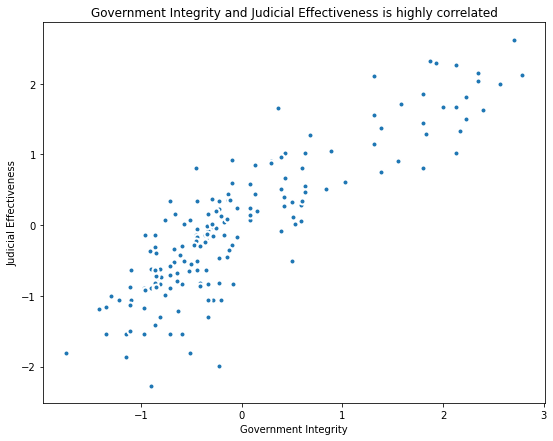

In [25]:
# Compare between government integrity and judicial effectiveness

plt.figure(figsize=(9,7))
sns.scatterplot(data=df_sc, x='government_integrity', y='judicial_effectiveness', linewidth=2)
plt.title("Government Integrity and Judicial Effectiveness is highly correlated")
plt.xlabel("Government Integrity")
plt.ylabel("Judicial Effectiveness")

plt.show()

In [26]:
x_km1 = df_sc[['government_integrity','judicial_effectiveness']]

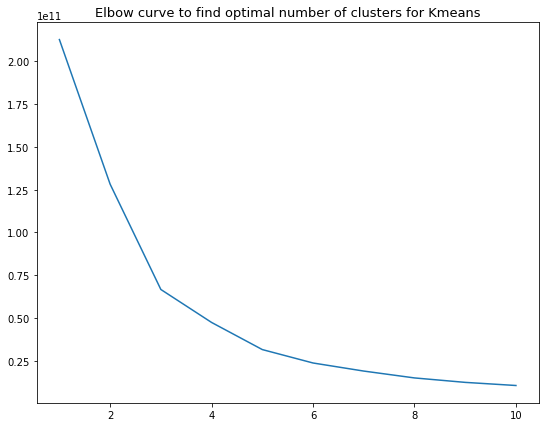

In [27]:
# Find the optimal clusters for KMeans using elbow curve

k = range(1,11)
sse = []
for i in k:
    
    km1 = KMeans(n_clusters=i)
    km1.fit(X)
    sse.append(km1.inertia_)
plt.figure(figsize=(9,7))    
plt.plot(k, sse, )
plt.title("Elbow curve to find optimal number of clusters for Kmeans", fontsize=13);

In [28]:
# Fit KMeans

km1 = KMeans(3)
x_km1['cluster'] = km1.fit_predict(x_km1)

In [29]:
x_km1.head()

,government_integrity,judicial_effectiveness,cluster
0,-0.866648,-0.891742,1
1,-0.089579,-0.835785,1
2,-0.677493,-0.522424,1
3,-1.106926,-1.059614,1
4,-0.442327,-0.057978,0


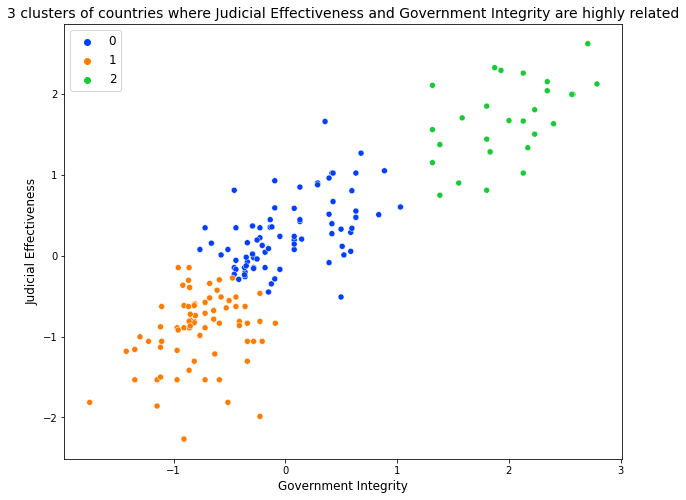

In [30]:
# Plot the KMeans 

plt.figure(figsize=(10,8))
sns.scatterplot(data=x_km1, x='government_integrity', y='judicial_effectiveness', hue='cluster', palette='bright')
plt.legend(fontsize= 12.0)
plt.title("3 clusters of countries where Judicial Effectiveness and Government Integrity are highly related",\
          fontsize=14)
plt.xlabel("Government Integrity", fontsize=12)
plt.ylabel("Judicial Effectiveness", fontsize=12)
plt.show()

In [31]:
# Extract 15 countries from the green KMeans clusters in the graph above

x_km1_cl_2 = x_km1[x_km1['cluster']==2]
Top_15_govt_integrity = df[df.index.isin(x_km1_cl_2.index)]
Top_15_govt_integrity = Top_15_govt_integrity.sort_values('government_integrity', ascending=False).head(15)
Top_15_govt_integrity

,countryid,country_name,region,world_rank,region_rank,2019_score,property_rights,judicial_effectiveness,government_integrity,tax_burden,...,gov_expenditure_of_gdp,population_(millions),gdp_(billions_ppp),gdp_growth_rate,5_year_gdp_growth_rate,gdp_per_capita_(ppp),unemployment,inflation,fdi_inflow_(millions),public_debt_(of_gdp)
119,120,New Zealand,Asia-Pacific,3,3,84.4,95.0,83.5,96.7,71.0,...,40.7,4.8,188.6,3.0,3.3,38934.0,4.9,1.9,3572.0,26.4
146,147,Singapore,Asia-Pacific,2,2,89.4,97.4,92.4,95.1,90.4,...,17.6,5.6,527.0,3.6,3.5,93906.0,2.0,0.6,62006.0,110.9
58,57,Finland,Europe,20,11,74.9,89.6,81.2,92.5,66.8,...,55.6,5.5,244.0,3.0,0.8,44333.0,8.6,0.8,1327.9,61.4
123,124,Norway,Europe,26,15,73.0,86.1,81.2,92.3,57.4,...,49.9,5.3,380.0,1.8,1.6,71831.0,4.2,1.9,-8296.9,36.7
118,119,Netherlands,Europe,13,5,76.8,88.0,74.7,89.1,51.6,...,43.6,17.1,916.1,3.1,1.8,53635.0,4.8,1.3,57956.7,56.7
156,158,Switzerland,Europe,4,1,81.9,85.3,82.0,88.0,70.5,...,34.3,8.4,517.2,1.1,1.6,61422.0,4.8,0.5,40986.1,42.8
155,157,Sweden,Europe,19,10,75.2,89.5,84.0,88.0,43.2,...,49.4,10.1,520.9,2.4,2.8,51475.0,6.7,1.9,15395.7,40.9
98,99,Luxembourg,Europe,17,9,75.9,83.0,72.4,85.8,65.4,...,42.2,0.6,62.7,3.5,3.8,106374.0,5.5,2.1,6622.7,23.0
45,45,Denmark,Europe,14,6,76.7,86.2,77.8,85.8,42.0,...,53.4,5.7,286.8,2.1,1.6,49883.0,5.7,1.1,-3114.7,36.4
29,29,Canada,Americas,8,1,77.7,87.0,69.4,84.6,76.8,...,40.3,36.7,1769.3,3.0,2.1,48265.0,6.3,1.6,24243.8,89.7


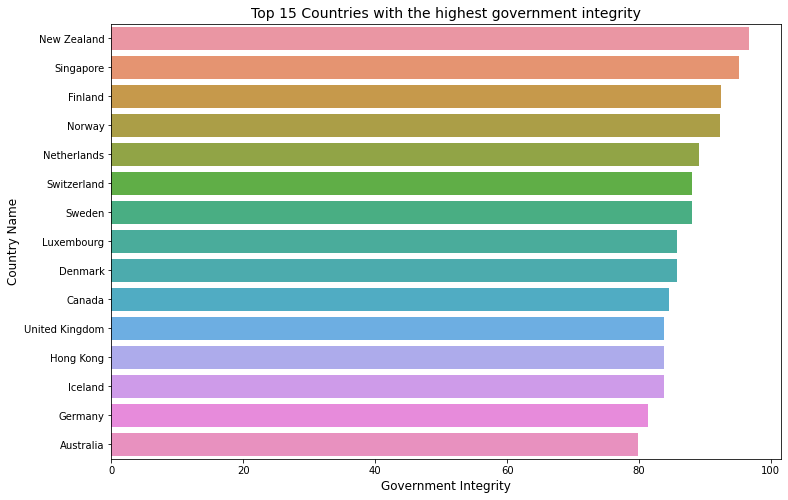

In [32]:
# Visualise the countries on a bar chart

plt.figure(figsize=(12,8))
sns.barplot(data=Top_15_govt_integrity, x='government_integrity', y='country_name')
plt.title("Top 15 Countries with the highest government integrity", fontsize=14)
plt.xlabel("Government Integrity", fontsize=12)
plt.ylabel("Country Name", fontsize=12);

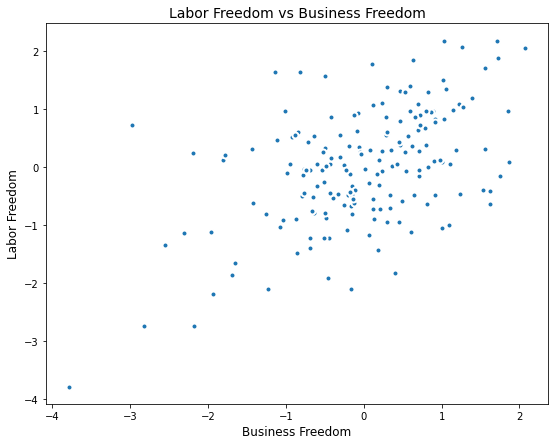

In [33]:
# Compare between business freedom and labor freedom

plt.figure(figsize=(9,7))
sns.scatterplot(data=df_sc, x='business_freedom', y='labor_freedom', linewidth=2)
plt.title("Labor Freedom vs Business Freedom", fontsize=14)
plt.xlabel("Business Freedom", fontsize=12)
plt.ylabel("Labor Freedom", fontsize=12)
plt.show()

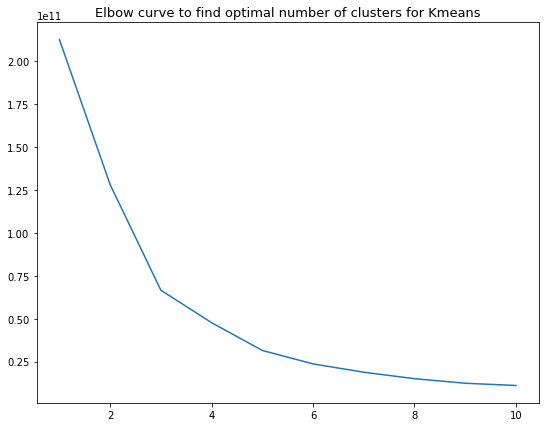

In [34]:
# Find the optimal cluster for KMeans using the elbow curve

x_km2 = df_sc[['business_freedom','labor_freedom']]
k = range(1,11)
sse = []
for i in k:
    
    km2 = KMeans(n_clusters=i)
    km2.fit(X)
    sse.append(km2.inertia_)
plt.figure(figsize=(9,7))    
plt.plot(k, sse, )
plt.title("Elbow curve to find optimal number of clusters for Kmeans", fontsize=13);

In [35]:
# Fit the KMeans

km2 = KMeans(3)
x_km2['cluster'] = km2.fit_predict(x_km2)

In [36]:
x_km2.head()

,business_freedom,labor_freedom,cluster
0,-0.953027,0.056573,1
1,0.336881,-0.476832,1
2,-0.157263,-0.670797,1
3,-0.535893,-0.054264,1
4,-0.490971,-0.878617,1


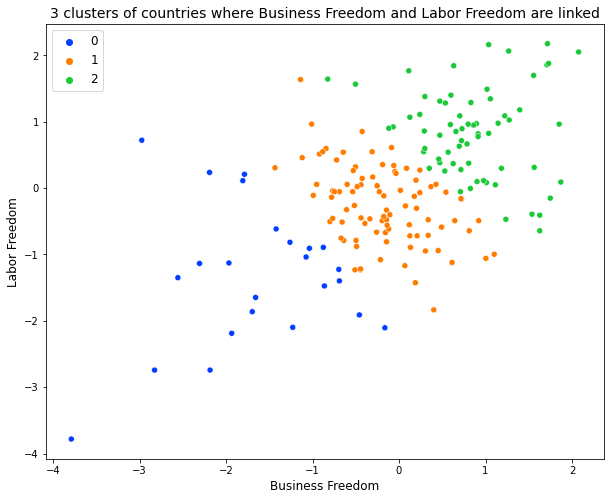

In [37]:
# Plot Kmeans on the scatterplot

plt.figure(figsize=(10,8))
sns.scatterplot(data=x_km2, x='business_freedom', y='labor_freedom', hue='cluster', palette='bright')
plt.legend(fontsize= 12.0)
plt.title("3 clusters of countries where Business Freedom and Labor Freedom are linked",\
          fontsize=14)
plt.xlabel("Business Freedom", fontsize=12)
plt.ylabel("Labor Freedom", fontsize=12)
plt.show()

In [38]:
# Find the top 15 countries that promote business freedom most

x_km2_cl_2 = x_km2[x_km2['cluster']==2]
Top_15_business_freedom = df[df.index.isin(x_km2_cl_2.index)]
Top_15_business_freedom = Top_15_business_freedom.sort_values('business_freedom', ascending=False).head(15)
Top_15_business_freedom

,countryid,country_name,region,world_rank,region_rank,2019_score,property_rights,judicial_effectiveness,government_integrity,tax_burden,...,gov_expenditure_of_gdp,population_(millions),gdp_(billions_ppp),gdp_growth_rate,5_year_gdp_growth_rate,gdp_per_capita_(ppp),unemployment,inflation,fdi_inflow_(millions),public_debt_(of_gdp)
72,71,Hong Kong,Asia-Pacific,1,1,90.2,93.3,75.3,83.8,93.1,...,17.9,7.4,454.9,3.8,2.8,61393.0,3.1,1.5,104333.0,0.1
157,160,Taiwan,Asia-Pacific,10,5,77.3,85.4,70.1,69.2,75.0,...,17.7,23.6,1185.5,2.8,2.2,50294.0,3.8,0.6,3255.0,35.2
171,174,United Kingdom,Europe,7,3,78.9,92.3,85.9,83.8,64.7,...,41.6,66.1,2914.0,1.8,2.2,44118.0,4.3,2.7,15090.0,87.0
88,88,"Korea, South",Asia-Pacific,29,7,72.3,79.3,57.5,50.5,64.2,...,32.4,51.5,2029.0,3.1,3.0,39434.0,3.7,1.9,17052.8,39.8
119,120,New Zealand,Asia-Pacific,3,3,84.4,95.0,83.5,96.7,71.0,...,40.7,4.8,188.6,3.0,3.3,38934.0,4.9,1.9,3572.0,26.4
146,147,Singapore,Asia-Pacific,2,2,89.4,97.4,92.4,95.1,90.4,...,17.6,5.6,527.0,3.6,3.5,93906.0,2.0,0.6,62006.0,110.9
45,45,Denmark,Europe,14,6,76.7,86.2,77.8,85.8,42.0,...,53.4,5.7,286.8,2.1,1.6,49883.0,5.7,1.1,-3114.7,36.4
123,124,Norway,Europe,26,15,73.0,86.1,81.2,92.3,57.4,...,49.9,5.3,380.0,1.8,1.6,71831.0,4.2,1.9,-8296.9,36.7
58,57,Finland,Europe,20,11,74.9,89.6,81.2,92.5,66.8,...,55.6,5.5,244.0,3.0,0.8,44333.0,8.6,0.8,1327.9,61.4
74,73,Iceland,Europe,11,4,77.1,87.4,63.8,83.8,72.7,...,43.2,0.3,17.6,3.6,4.4,51842.0,2.8,1.8,-5.4,40.9


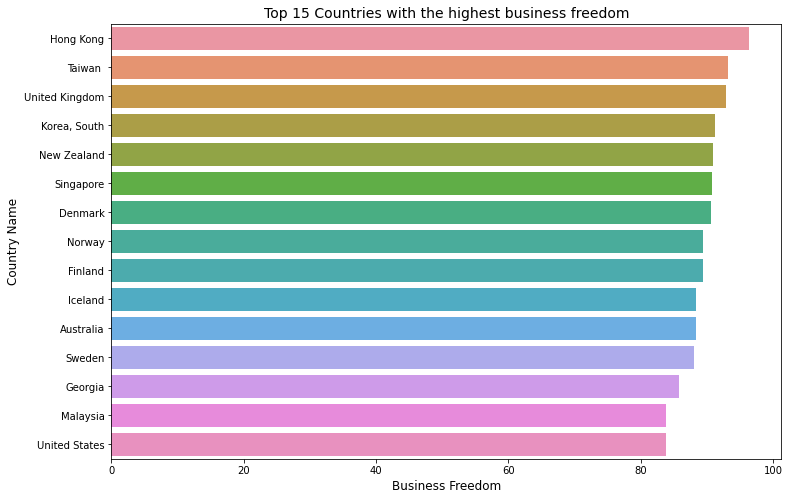

In [39]:
# Plot the results from the previous findings

plt.figure(figsize=(12,8))
sns.barplot(data=Top_15_business_freedom, x='business_freedom', y='country_name')
plt.title("Top 15 Countries with the highest business freedom", fontsize=14)
plt.xlabel("Business Freedom", fontsize=12)
plt.ylabel("Country Name", fontsize=12);

### USE DBSCAN TO COMPARE 

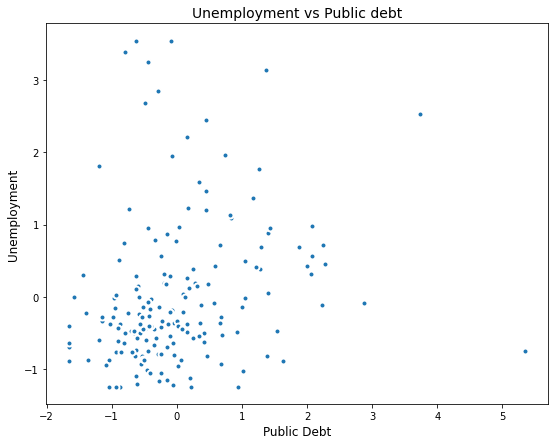

In [40]:
# Compare features for public debt and unemployment, visualise with a scatterplot

plt.figure(figsize=(9,7))
sns.scatterplot(data=df_sc, x='public_debt_(of_gdp)', y='unemployment', linewidth=2)
plt.title("Unemployment vs Public debt", fontsize=14)
plt.xlabel("Public Debt", fontsize=12)
plt.ylabel("Unemployment", fontsize=12)

plt.show();

In [41]:
debt_unemp = df_sc[['public_debt_(of_gdp)','unemployment']]

In [42]:
# Fit into DBSCAN model

from sklearn.cluster import DBSCAN
debt_unemp['cluster'] = DBSCAN(eps=.3, min_samples=5).fit_predict(debt_unemp)


In [43]:
debt_unemp.cluster.value_counts()

 0    119
-1     50
 1      6
 2      5
Name: cluster, dtype: int64

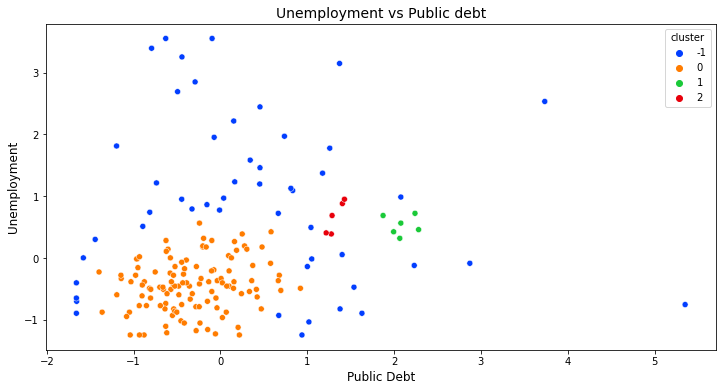

In [44]:
# Plot into a scatterplot to show the DBSCAN

plt.figure(figsize=(12,6))
sns.scatterplot(data=debt_unemp, x='public_debt_(of_gdp)', y='unemployment',hue='cluster', palette='bright')
plt.title("Unemployment vs Public debt", fontsize=14)
plt.xlabel("Public Debt", fontsize=12)
plt.ylabel("Unemployment", fontsize=12)
plt.show();

In [45]:
# Extract 15 countries in the orange clusters

debt_unemp_cl_0 = debt_unemp[debt_unemp['cluster']==0]
orange_cluster_countries = df[df.index.isin(debt_unemp_cl_0.index)]
orange_cluster_countries = orange_cluster_countries.sort_values('public_debt_(of_gdp)', ascending=True).head(15)
orange_cluster_countries

,countryid,country_name,region,world_rank,region_rank,2019_score,property_rights,judicial_effectiveness,government_integrity,tax_burden,...,gov_expenditure_of_gdp,population_(millions),gdp_(billions_ppp),gdp_growth_rate,5_year_gdp_growth_rate,gdp_per_capita_(ppp),unemployment,inflation,fdi_inflow_(millions),public_debt_(of_gdp)
54,54,Estonia,Europe,15,7,76.6,81.5,76.0,73.1,79.9,...,40.4,1.3,41.6,4.9,2.7,31750.0,5.8,3.7,784.4,8.8
149,150,Solomon Islands,Asia-Pacific,133,33,54.6,49.9,51.7,33.5,65.5,...,46.0,0.6,1.3,3.2,2.9,2157.0,2.1,-0.4,36.5,10.0
37,37,Congo,Sub-Saharan Africa,157,34,50.3,25.3,30.7,26.2,73.8,...,14.2,86.7,68.5,3.4,6.1,790.0,3.7,41.5,1340.2,15.7
141,142,Saudi Arabia,Middle East and North Africa,91,9,60.7,55.0,62.7,49.8,99.8,...,37.6,32.4,1773.6,-0.7,2.3,54777.0,5.5,-0.9,1421.0,17.3
135,136,Russia,Europe,98,41,58.9,52.4,45.1,36.6,89.4,...,35.4,144.0,4007.8,1.5,0.3,27834.0,5.2,3.7,25284.0,17.4
170,173,United Arab Emirates,Middle East and North Africa,9,1,77.6,81.8,87.1,78.8,99.2,...,32.3,10.1,686.8,0.5,3.3,67741.0,1.7,2.0,10354.2,19.5
90,89,Kuwait,Middle East and North Africa,90,8,60.8,52.9,43.3,35.3,97.7,...,52.5,4.4,291.5,-2.5,-0.1,66163.0,2.1,1.5,300.5,20.6
89,185,Kosovo,Europe,51,26,67.0,57.2,53.5,44.7,92.5,...,27.2,1.9,19.6,4.1,3.4,10515.0,0.0,1.5,3.6,20.9
84,84,Kazakhstan,Asia-Pacific,59,12,65.4,59.3,56.1,40.3,93.4,...,23.3,18.2,477.6,4.0,3.3,26252.0,4.9,7.4,4633.7,21.2
98,99,Luxembourg,Europe,17,9,75.9,83.0,72.4,85.8,65.4,...,42.2,0.6,62.7,3.5,3.8,106374.0,5.5,2.1,6622.7,23.0


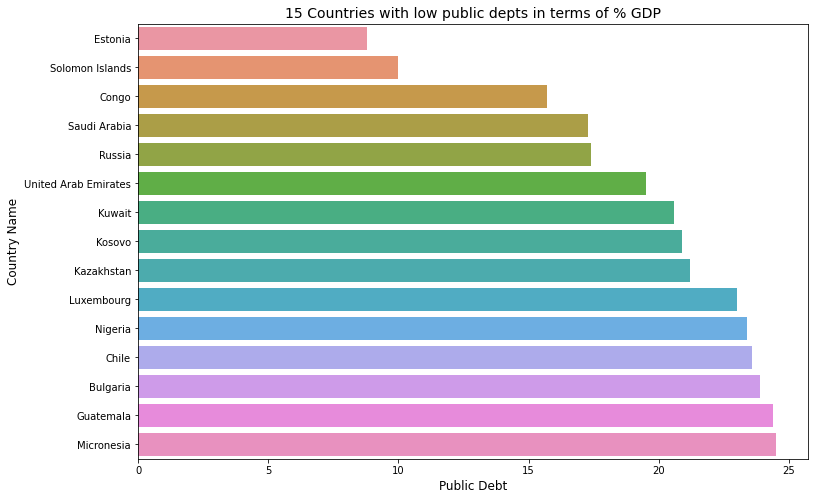

In [46]:
# Plot into bar chart for visualisation

plt.figure(figsize=(12,8))
sns.barplot(data=orange_cluster_countries, x='public_debt_(of_gdp)', y='country_name')
plt.title("15 Countries with low public depts in terms of % GDP", fontsize=14)
plt.xlabel("Public Debt", fontsize=12)
plt.ylabel("Country Name", fontsize=12);

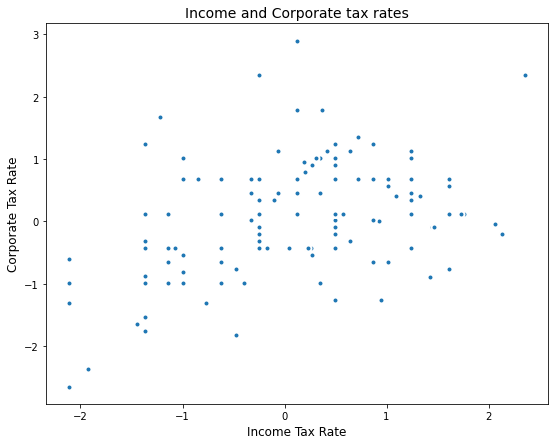

In [47]:
# Compare income tax and corporate tax rates

plt.figure(figsize=(9,7))
sns.scatterplot(data=df_sc, x='income_tax_rate', y='corporate_tax_rate', linewidth=2)
plt.title("Income and Corporate tax rates", fontsize=14)
plt.xlabel("Income Tax Rate", fontsize=12)
plt.ylabel("Corporate Tax Rate", fontsize=12)

plt.show();

In [48]:
tax_rate = df_sc[['income_tax_rate','corporate_tax_rate']]

In [49]:
# Use KMeans and fit

km4 = KMeans(3)
tax_rate['cluster_kmeans'] = km4.fit_predict(tax_rate)

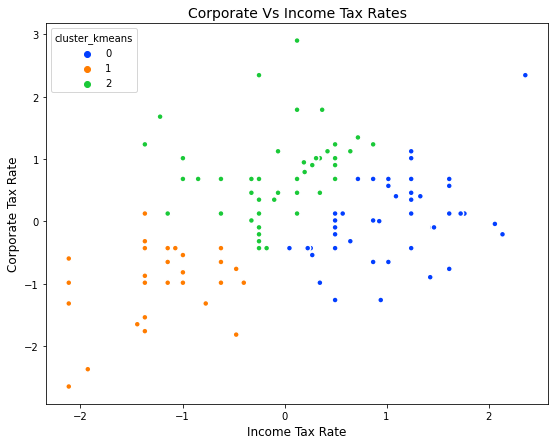

In [50]:
# Plot the KMeans clusters

plt.figure(figsize=(9,7))
sns.scatterplot(data=tax_rate, x='income_tax_rate', y='corporate_tax_rate', linewidth=1.5, hue='cluster_kmeans',\
               palette='bright')
plt.title("Corporate Vs Income Tax Rates", fontsize=14)
plt.xlabel("Income Tax Rate", fontsize=12)
plt.ylabel("Corporate Tax Rate", fontsize=12)

plt.show();

In [51]:
# Using DBSCAN algorithm

tax_rate['cluster_dbs'] = DBSCAN(eps=1, min_samples=4).fit_predict(tax_rate)
tax_rate.cluster_dbs.value_counts()

 2    78
 1    56
 0    45
-1     1
Name: cluster_dbs, dtype: int64

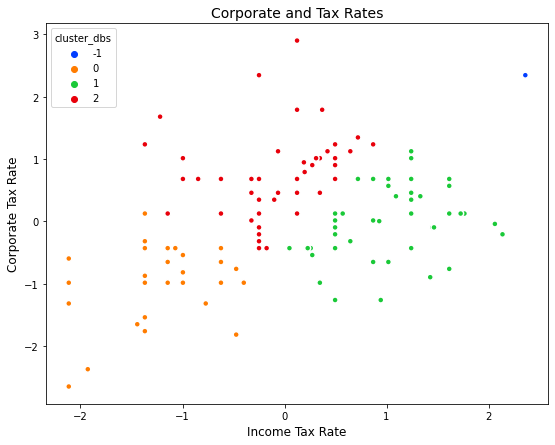

In [52]:
# Plot the DBSCAN clusters

plt.figure(figsize=(9,7))
sns.scatterplot(data=tax_rate, x='income_tax_rate', y='corporate_tax_rate', linewidth=1.5, hue='cluster_dbs',palette='bright')
plt.title("Corporate and Tax Rates", fontsize=14)
plt.xlabel("Income Tax Rate", fontsize=12)
plt.ylabel("Corporate Tax Rate", fontsize=12)

plt.show();

In [53]:
# Identify the countries in the red clusters from the graph above

tax_rate_cl_2 = tax_rate[tax_rate['cluster_dbs']==2]
red_cluster_countries = df[df.index.isin(tax_rate_cl_2.index)]
red_cluster_countries = red_cluster_countries.sort_values('corporate_tax_rate', ascending=False).head(15)
red_cluster_countries

,countryid,country_name,region,world_rank,region_rank,2019_score,property_rights,judicial_effectiveness,government_integrity,tax_burden,...,gov_expenditure_of_gdp,population_(millions),gdp_(billions_ppp),gdp_growth_rate,5_year_gdp_growth_rate,gdp_per_capita_(ppp),unemployment,inflation,fdi_inflow_(millions),public_debt_(of_gdp)
36,36,Comoros,Sub-Saharan Africa,124,20,55.4,36.5,29.6,24.4,63.9,...,29.8,0.8,1.3,2.5,2.2,1588.0,4.3,1.0,8.6,28.4
11,12,Bangladesh,Asia-Pacific,121,27,55.6,36.1,34.5,24.4,72.7,...,13.6,163.2,687.1,7.1,6.7,4211.0,4.4,5.7,2151.6,32.4
69,68,Guyana,Americas,113,23,56.8,41.7,42.9,33.2,67.0,...,32.0,0.8,6.3,2.1,3.5,8161.0,12.0,2.1,212.2,50.7
37,37,Congo,Sub-Saharan Africa,157,34,50.3,25.3,30.7,26.2,73.8,...,14.2,86.7,68.5,3.4,6.1,790.0,3.7,41.5,1340.2,15.7
99,100,Macau,Asia-Pacific,34,9,71.0,60.0,60.0,33.2,77.1,...,17.9,0.6,71.8,9.3,-0.6,111629.0,2.0,1.2,1996.8,0.0
154,155,Suriname,Americas,165,28,48.1,49.1,22.2,35.5,70.9,...,27.6,0.6,8.5,0.0,-0.9,14606.0,8.1,22.0,-87.3,72.1
86,86,Kiribati,Asia-Pacific,168,41,47.3,44.1,34.3,35.1,73.0,...,117.9,0.1,0.2,3.1,3.6,1976.0,0.0,2.2,1.4,26.3
153,154,Sudan,Sub-Saharan Africa,166,41,47.7,27.5,22.2,26.2,86.3,...,10.6,40.8,187.0,3.2,3.0,4586.0,12.7,32.4,1065.3,126.0
106,107,Malta,Europe,41,20,68.6,69.8,50.4,50.3,64.2,...,38.3,0.5,19.3,6.6,6.9,41945.0,4.0,1.3,3185.2,52.6
105,106,Mali,Sub-Saharan Africa,103,12,58.1,33.7,33.4,29.6,68.7,...,22.1,18.9,41.0,5.3,5.3,2170.0,7.9,1.8,265.6,35.6


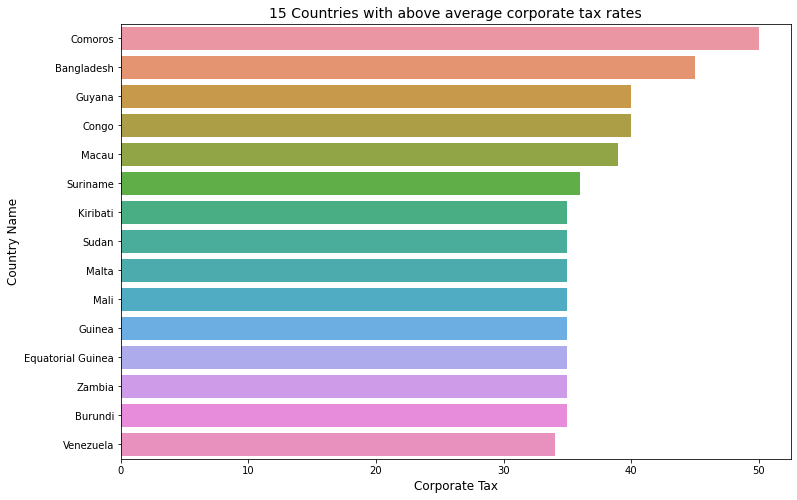

In [54]:
# For visualisation, plot the countries with the lowest or no income tax rates

plt.figure(figsize=(12,8))
sns.barplot(data=red_cluster_countries, x='corporate_tax_rate', y='country_name')
plt.title("15 Countries with above average corporate tax rates", fontsize=14)
plt.xlabel("Corporate Tax", fontsize=12)
plt.ylabel("Country Name", fontsize=12);

In [55]:
# Identify the countries in the orange clusters

tax_rate_cl_0 = tax_rate[tax_rate['cluster_dbs']==0]
orange_cluster_countries = df[df.index.isin(tax_rate_cl_0.index)]
orange_cluster_countries = orange_cluster_countries.sort_values('income_tax_rate', ascending=True).head(15)
orange_cluster_countries

,countryid,country_name,region,world_rank,region_rank,2019_score,property_rights,judicial_effectiveness,government_integrity,tax_burden,...,gov_expenditure_of_gdp,population_(millions),gdp_(billions_ppp),gdp_growth_rate,5_year_gdp_growth_rate,gdp_per_capita_(ppp),unemployment,inflation,fdi_inflow_(millions),public_debt_(of_gdp)
175,178,Vanuatu,Asia-Pacific,116,26,56.4,65.9,36.4,51.9,97.3,...,39.1,0.3,0.8,4.2,2.4,2739.0,5.2,3.1,24.7,48.4
87,87,"Korea, North",Asia-Pacific,180,43,5.9,31.6,5.0,24.4,0.0,...,100.0,25.4,40.0,1.1,0.0,1700.0,4.8,0.0,63.4,0.0
124,125,Oman,Middle East and North Africa,88,7,61.0,58.1,51.6,53.8,97.8,...,47.4,4.1,186.6,-0.3,2.7,45157.0,3.3,1.6,1867.4,44.2
133,134,Qatar,Middle East and North Africa,28,3,72.6,64.5,60.0,77.4,99.7,...,37.9,2.7,340.6,2.1,3.3,124529.0,0.1,0.4,986.0,54.0
104,105,Maldives,Asia-Pacific,141,37,53.2,43.9,36.4,33.5,95.8,...,36.1,0.4,6.9,4.8,5.2,19151.0,5.0,2.8,517.5,68.1
22,186,Brunei Darussalam,Asia-Pacific,63,14,65.1,64.0,56.0,43.7,90.7,...,36.6,0.4,33.5,0.5,-1.4,78196.0,7.1,-0.1,-46.3,2.7
90,89,Kuwait,Middle East and North Africa,90,8,60.8,52.9,43.3,35.3,97.7,...,52.5,4.4,291.5,-2.5,-0.1,66163.0,2.1,1.5,300.5,20.6
10,11,Bahrain,Middle East and North Africa,54,5,66.4,63.5,50.7,53.6,99.7,...,35.3,1.5,70.4,3.2,3.8,48505.0,1.2,1.4,518.9,90.3
9,10,Bahamas,Americas,76,15,62.9,42.2,46.9,43.7,97.3,...,21.0,0.4,11.6,1.3,-0.7,31139.0,12.6,1.4,927.7,57.2
170,173,United Arab Emirates,Middle East and North Africa,9,1,77.6,81.8,87.1,78.8,99.2,...,32.3,10.1,686.8,0.5,3.3,67741.0,1.7,2.0,10354.2,19.5


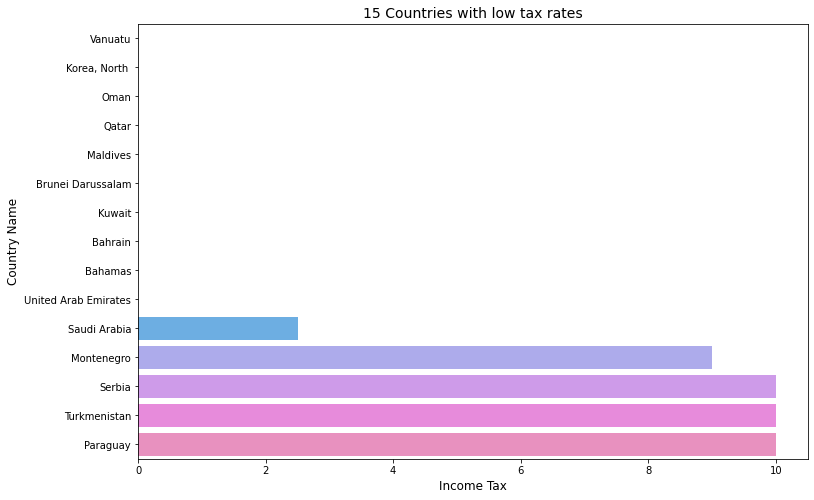

In [56]:
# Plot the bar graph to demonstrate the 15 countries found in the orange clusters

plt.figure(figsize=(12,8))
sns.barplot(data=orange_cluster_countries, x='income_tax_rate', y='country_name')
plt.title("15 Countries with low tax rates", fontsize=14)
plt.xlabel("Income Tax", fontsize=12)
plt.ylabel("Country Name", fontsize=12);

In [57]:
# Identify the countries in the green clusters

tax_rate_cl_1 = tax_rate[tax_rate['cluster_dbs']==1]
green_cluster_countries = df[df.index.isin(tax_rate_cl_1.index)]
green_cluster_countries = green_cluster_countries.sort_values('income_tax_rate', ascending=False).head(15)
green_cluster_countries

,countryid,country_name,region,world_rank,region_rank,2019_score,property_rights,judicial_effectiveness,government_integrity,tax_burden,...,gov_expenditure_of_gdp,population_(millions),gdp_(billions_ppp),gdp_growth_rate,5_year_gdp_growth_rate,gdp_per_capita_(ppp),unemployment,inflation,fdi_inflow_(millions),public_debt_(of_gdp)
155,157,Sweden,Europe,19,10,75.2,89.5,84.0,88.0,43.2,...,49.4,10.1,520.9,2.4,2.8,51475.0,6.7,1.9,15395.7,40.9
45,45,Denmark,Europe,14,6,76.7,86.2,77.8,85.8,42.0,...,53.4,5.7,286.8,2.1,1.6,49883.0,5.7,1.1,-3114.7,36.4
118,119,Netherlands,Europe,13,5,76.8,88.0,74.7,89.1,51.6,...,43.6,17.1,916.1,3.1,1.8,53635.0,4.8,1.3,57956.7,56.7
179,183,Zimbabwe,Sub-Saharan Africa,175,45,40.4,29.7,24.8,15.8,62.3,...,29.2,14.9,34.0,3.0,2.6,2283.0,5.0,1.3,289.4,78.4
148,149,Slovenia,Europe,58,29,65.5,76.4,46.5,53.6,58.4,...,45.4,2.1,71.1,5.0,2.5,34407.0,6.6,1.4,702.0,75.4
7,8,Austria,Europe,31,16,72.0,84.2,71.3,77.4,50.5,...,50.2,8.8,439.6,2.9,1.3,49869.0,5.5,2.2,9629.6,78.8
14,15,Belgium,Europe,48,25,67.3,81.3,61.6,72.5,47.1,...,53.2,11.4,528.5,1.7,1.2,46553.0,7.4,2.2,740.4,103.2
31,31,Central African Republic,Sub-Saharan Africa,161,38,49.1,19.6,29.6,23.2,65.2,...,13.9,5.0,3.4,4.0,-4.5,677.0,6.0,3.8,17.2,53.4
42,42,Cuba,Americas,178,31,27.8,31.6,10.0,37.7,48.8,...,64.2,11.5,148.0,0.9,1.9,12920.0,2.6,5.5,0.0,47.7
132,133,Portugal,Europe,62,30,65.3,71.5,64.3,59.5,59.9,...,46.3,10.3,313.4,2.7,1.2,30417.0,8.9,1.6,6945.6,125.6


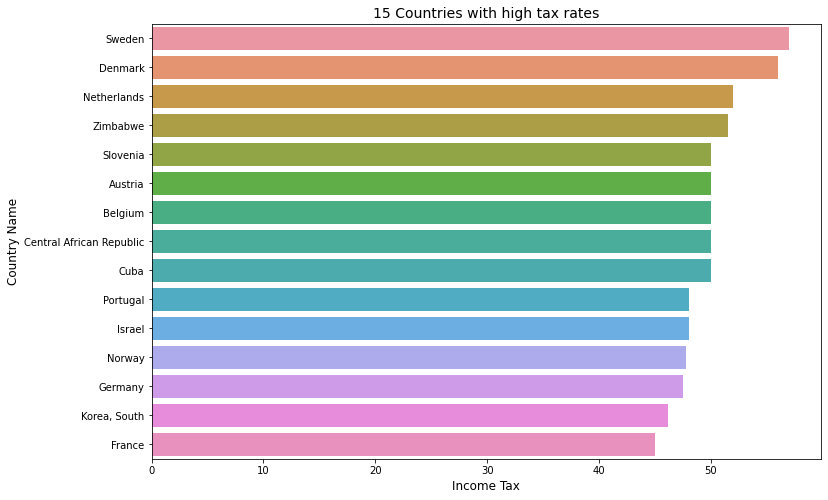

In [58]:
# Plot the bar graph for the 15 countries in the green clusters

plt.figure(figsize=(12,8))
sns.barplot(data=green_cluster_countries, x='income_tax_rate', y='country_name')
plt.title("15 Countries with high tax rates", fontsize=14)
plt.xlabel("Income Tax", fontsize=12)
plt.ylabel("Country Name", fontsize=12);

### The End